In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('indicators.csv')

In [3]:
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'IND'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)
stage = data[mask1 & mask2]

In [4]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11577,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.268161
36513,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.284292
64049,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.306519
92493,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.322533
121290,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.308900


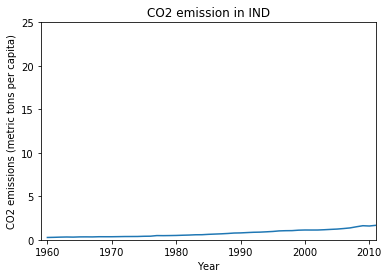

In [5]:
years = stage['Year'].values
CO2 = stage['Value'].values
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])
plt.title('CO2 emission in IND')
plt.axis([1959,2011,0,25])
plt.plot(years,CO2)
plt.show()

## Using Histogram to explore the distribution of values

In [6]:
lower = stage['Value'].mean() - stage['Value'].std()
upper = stage['Value'].mean() + stage['Value'].std()
hist_data = [x for x in stage[:10000]['Value'] if x>lower and x<upper]

In [7]:
#hist_data = stage['Value'].values

In [8]:
print(len(hist_data))

35


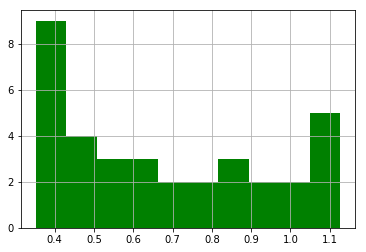

In [9]:
plt.hist(hist_data, 10, normed = False, facecolor = 'green')
plt.grid()
plt.show()

In [10]:
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011
mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


In [11]:
print(len(co2_2011))

232


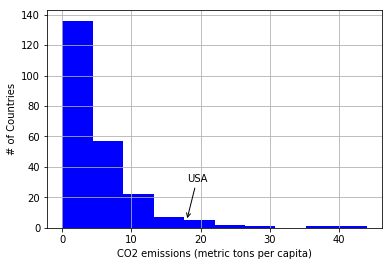

In [12]:
fig, ax = plt.subplots()
ax.annotate("USA",
           xy  = (18,5), xycoords = 'data',
           xytext = (18,30), textcoords = 'data',
           arrowprops = dict(arrowstyle = "->",
                            connectionstyle = "arc3"),
           )
plt.hist(co2_2011['Value'], 10, normed = False, facecolor = 'blue')
plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.grid()
plt.show()

## Relationship between GDP and CO2 Emissions in IND

In [13]:
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'IND'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'] == hist_country

gdp_stage = data[mask1 & mask2]
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11616,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,228.304470
36555,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,232.142053
64095,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,234.166685
92540,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,243.176418
121337,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,255.963668


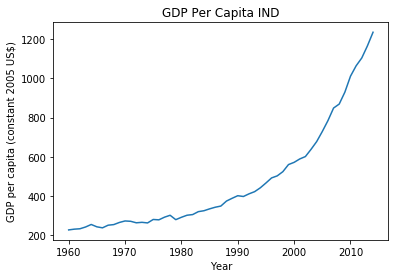

In [14]:
plt.plot(gdp_stage['Year'].values,gdp_stage['Value'].values)
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])
plt.title('GDP Per Capita IND')
plt.show()

## ScatterPlot for comparing GDP against CO2 emissions(per capita) 

In [15]:
print("GDP Min Year = ", gdp_stage['Year'].min(),"Max:", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(),"Max:", stage['Year'].max())

GDP Min Year =  1960 Max: 2014
CO2 Min Year =  1960 Max: 2011


In [16]:
gdp_stage = gdp_stage[gdp_stage['Year'] <=2011]

In [17]:
print("GDP Min Year = ", gdp_stage['Year'].min(),"Max:", gdp_stage['Year'].max())
print("CO2 Min Year = ", stage['Year'].min(),"Max:", stage['Year'].max())

GDP Min Year =  1960 Max: 2011
CO2 Min Year =  1960 Max: 2011


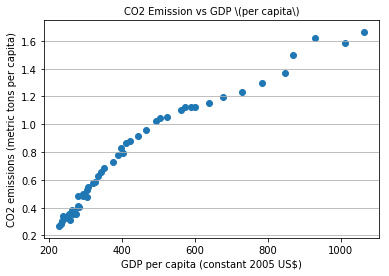

In [18]:
fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title('CO2 Emission vs GDP \(per capita\)',fontsize = 10)
axis.set_xlabel(gdp_stage['IndicatorName'].iloc[0],fontsize = 10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize = 10)
X = gdp_stage['Value']
y = stage['Value']
axis.scatter(X,y)
plt.show()

In [19]:
np.corrcoef(gdp_stage['Value'],stage['Value'])

array([[1.        , 0.96753758],
       [0.96753758, 1.        ]])

## World Gdp vs Co2 emission

In [20]:
hist_indicator1 = 'CO2 emissions \(metric'
hist_indicator2 = 'GDP per capita \(constant 2005'
mask1 = data['IndicatorName'].str.contains(hist_indicator1)
mask2 = data['IndicatorName'].str.contains(hist_indicator2)

In [21]:
co2_emission = data[mask1]
gdp = data[mask2]

In [22]:
co2_emission.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
86,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.402641
166,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,5.114244
239,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.162003
362,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.952729


In [23]:
gdp.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
263,East Asia & Pacific (all income levels),EAS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,982.026842
376,East Asia & Pacific (developing only),EAP,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,168.600612
517,Euro area,EMU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,9388.717505
623,Europe & Central Asia (all income levels),ECS,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,6547.964873
835,European Union,EUU,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,8997.466960


In [24]:
print(co2_emission['Year'].min(),co2_emission['Year'].max())
print(gdp['Year'].min(), gdp['Year'].max())

1960 2011
1960 2014


In [25]:
gdp = gdp[gdp['Year']<=2011]

In [26]:
print(co2_emission['Year'].min(),co2_emission['Year'].max())
print(gdp['Year'].min(), gdp['Year'].max())

1960 2011
1960 2011


In [28]:
X = gdp['Value']
y = co2_emission['Value']
X.size,y.size

(9297, 10599)

ValueError: x and y must be the same size

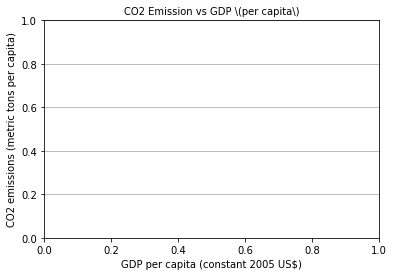

In [27]:
fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title('CO2 Emission vs GDP \(per capita\)',fontsize = 10)
axis.set_xlabel(gdp['IndicatorName'].iloc[0],fontsize = 10)
axis.set_ylabel(co2_emission['IndicatorName'].iloc[0],fontsize = 10)
axis.scatter(X,y)
plt.show()